## Saiyam Shah

## This notebook is Part 3 which is used to mine tweets pertaining to different terms, and plot heat map of the locations of the tweet to see the flu patterns

## Team Members 1) Saiyam Shah (saiyampr) 2) Kavi Sanghavi (kavinike)

In [1]:
install.packages("twitteR")

also installing the dependencies 'bit', 'bit64'

Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  cannot open URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'"

package 'bit' successfully unpacked and MD5 sums checked
package 'bit64' successfully unpacked and MD5 sums checked
package 'twitteR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\saiya\AppData\Local\Temp\RtmpOU9AN6\downloaded_packages


In [1]:
#load("D:/Data Intensive Computing/.RData")

### We use twitteR library to find tweets using the twitter developer authorisation keys

In [14]:
library(ggplot2)
library(twitteR)
setup_twitter_oauth("Egh4RNY4uHpoM8RUUKw5BlP5m", "U8yNmebt7zcLHl6TWuHdi8MIuhJZopPjEqjfnKL5JNEN7Les1A","1038148168305836032-EfLgqyaiZ8qoEpCRI2mLZY8enneJz3","c0un16XM5uaphP0g9LnnhAQHU3GUmAjXBN9R5olA9DiUu")

[1] "Using direct authentication"


### Searching for tweets using different terms in the USA regions

In [15]:
searchStr = 'flu'
fluData = searchTwitter(searchStr,geocode='37.09024,-95.712891,1340mi',n=20000, retryOnRateLimit=1)



[1] "Rate limited .... blocking for a minute and retrying up to 0 times ..."


Warning message in doAPICall(cmd, params = params, method = method, retryCount = retryCount, :
"Rate limit encountered & retry limit reached - returning partial results"

In [50]:
fluData

[[1]]
[1] "loganbrookeee21: @chesney_yo Flu and virus"

[[2]]
[1] "TheAnnMarieJohn: RT @sayhellonature: This Flu Time Essential Oil has really helped our family this Flu &amp; Cold Season! Stock up today plus Free Shipping! #af…"

[[3]]
[1] "Dave_DelFavero: RT @RealBrittHughes: Amazing how Dems will use one immigrant child dying of the flu to call all CBP officers Nazis, while simultaneously wr…"

[[4]]
[1] "OttsLisa: @Beatlemaniac201 @ThugPugMom @08_kenzi @Chrissandria1 @Boxster240 @RocksForLEOs @gillespie_USMC @ByzQueen… https://t.co/IFb9pg0xAc"

[[5]]
[1] "iam_amess: I've had the flu twice in the past two week<U+0001F612>"

[[6]]
[1] "bangUrMom22: RT @DLoesch: Speaking of kids, my youngest tested positive for type A flu. Came on so fast, he was fine this morning. A 103 degree fever an…"

[[7]]
[1] "CDCFlu: Our Twitter Takeover highlighting children and flu with Dr. Swanson has been postponed. A new date and time for thi… https://t.co/drrsrjyJ82"

[[8]]
[1] "flapjackxo: When you go t

### Inserting the tweets into a data frame

In [51]:
fluDataFrame = twListToDF(fluData)

In [58]:
nrow(fluDataFrame)

[1] 18000

In [59]:
write.csv(fluDataFrame,"tweets.csv")

### Most of the tweets do not contain geolocation so we search the users that tweeted the tweet and get their location

In [16]:
usernames <- fluDataFrame$screenName

In [17]:
users <- twListToDF(lookupUsers(usernames))

In [18]:
head(users)

,description,statusesCount,followersCount,favoritesCount,friendsCount,url,name,created,protected,verified,screenName,location,lang,id,listedCount,followRequestSent,profileImageUrl
loganbrookeee21,Queen Bee <U+0001F41D> •College • Fly high my baby Chass <U+0001F47C><U+0001F3FB> • Snap me: loganbrookeee •,11399,789,1675,629,https://t.co/6dCendTxLJ,L•L•B,2012-10-28 17:34:26,FALSE,FALSE,loganbrookeee21,"Conway, SC",en,910763575,1,FALSE,http://pbs.twimg.com/profile_images/1080518637574934528/U9LjSUQ5_normal.jpg
TheAnnMarieJohn,Lifestyle & Family Travel Influencer <U+0001F31F> Base<U+0001F4CD>Colorado <U+0001F31F> Now <U+2708><U+FE0E> ??? <U+0001F31F>Mom to @GrowinUpMadison <U+0001F31F>Collabs: annmarie@annmariejohn.com,118402,35494,2183,21379,https://t.co/5WXFrvq9z7,AnnMarie <U+0001F1FB><U+0001F1E8>,2013-05-16 13:57:06,FALSE,FALSE,TheAnnMarieJohn,NYC/CO,en,1433153444,451,FALSE,http://pbs.twimg.com/profile_images/868295486918320130/bbKmSdTR_normal.jpg
Dave_DelFavero,"@Orioles @Hokies RT means I'm amused, not necessarily how you intended. Ut Prosim. Ut veniam merear",24256,311,17944,703,NA,Toxic Pouncing Miscuelinity,2011-01-30 02:27:26,FALSE,FALSE,Dave_DelFavero,,en,244759662,2,FALSE,http://pbs.twimg.com/profile_images/1230404117/image_normal.jpg
OttsLisa,"I love God, my family, and counrty. Single mom, not sending money or gift cards! I love music, coffee, moutains, and waterfalls. May God Bless you.",9384,937,13742,3173,NA,Lisa,2013-04-01 17:55:11,FALSE,FALSE,OttsLisa,Mississippi,en,1320851173,5,FALSE,http://pbs.twimg.com/profile_images/1075695614086782977/oU2z3z_j_normal.jpg
iam_amess,"I never really have things planned out, shit just happens. Flagstaff, AZ. <U+0001F3E1><U+0001F3B6>I like to mix music from time to time",10515,565,41589,670,NA,Shaggy,2013-03-27 00:43:01,FALSE,FALSE,iam_amess,,en,1306061688,3,FALSE,http://pbs.twimg.com/profile_images/1056594262672867328/OYc0qqjS_normal.jpg
bangUrMom22,All the radical racists that hate white people and Jews use me as an excuse to get triggered and white folks. <U+0001F1FA><U+0001F1F8>#MAGA<U+0001F1FA><U+0001F1F8> Smirking right now!,15611,1105,7671,1391,NA,#MAGA HAT!,2017-10-10 20:36:01,FALSE,FALSE,bangUrMom22,"Grayson, KY",en,917851234215874560,25,FALSE,http://pbs.twimg.com/profile_images/1088272754909106176/sIrRY4-J_normal.jpg


In [36]:
usersWithLocation <- users$location[(users$location != "")]

In [38]:
head(usersWithLocation)

[1] "Conway, SC"   "NYC/CO"       "Mississippi"  "Grayson, KY"  "Atlanta, GA" 
[6] "Florida, USA"

In [21]:
write.csv(usersWithLocation, "tweetsLocations.csv")

In [8]:
searchStr = 'influenza'
influenzaData = searchTwitter(searchStr,  geocode='37.09024,-95.712891,1340mi', n=8000, retryOnRateLimit=1)

Warning message in doRppAPICall("search/tweets", n, params = params, retryOnRateLimit = retryOnRateLimit, :
"8000 tweets were requested but the API can only return 6477"

In [ ]:
searchStr = 'fever'
feverData = searchTwitter(searchStr,  geocode='37.09024,-95.712891,1340mi', n=8000, retryOnRateLimit=1)

In [ ]:
tweet <- read.csv("tweetsLocations.csv")

### We have the locations of the users so we will reverse geomap the latitude and longitude to get the state names using geomap

In [ ]:
result <- geocode(as.character(tweet$x))

#### Src : http://stackoverflow.com

In [ ]:
latlong2state <- function(final_result) {
  all_states <- map('state', fill=TRUE, col="transparent", plot=FALSE)
  IDs <- sapply(strsplit(all_states$names, ":"), function(x) x[1])
  SpatialStates <- map2SpatialPolygons(all_states, IDs=IDs, proj4string=CRS("+proj=longlat +datum=WGS84"))
  SP_points <- SpatialPoints(final_result, 
                            proj4string=CRS("+proj=longlat +datum=WGS84"))
  index <- over(SP_points, SpatialStates)
  state_Names <- sapply(SpatialStates@polygons, function(x) x@ID)
  state_Names[index]
}

In [18]:
library(sp)
library(maps)
library(maptools)

Warning message:
"package 'sp' was built under R version 3.5.2"Warning message:
"package 'maps' was built under R version 3.5.2"Warning message:
"package 'maptools' was built under R version 3.5.2"Checking rgeos availability: FALSE
 	Note: when rgeos is not available, polygon geometry 	computations in maptools depend on gpclib,
 	which has a restricted licence. It is disabled by default;
 	to enable gpclib, type gpclibPermit()


### Remove the locations with NA form

In [ ]:
result <- result[complete.cases(result), ]

In [20]:
stateList <- latlong2state(result)

In [ ]:
write.csv(stateList,"states.csv")

In [4]:
states <- read.csv("states.csv")

In [5]:
states

X,x
1,south carolina
2,new york
3,mississippi
4,kentucky
5,georgia
6,florida
7,tennessee
8,rhode island
9,NA
10,oklahoma


### Calculating frequency of each state

In [6]:
region <- table(states$x)

In [7]:
region


             alabama              arizona             arkansas 
                 153                  148                  106 
          california             colorado          connecticut 
                 960                  143                  107 
            delaware district of columbia              florida 
                  22                  129                  452 
             georgia                idaho             illinois 
                 381                   39                  397 
             indiana                 iowa               kansas 
                 180                   73                 1025 
            kentucky            louisiana                maine 
                 226                  211                   46 
            maryland        massachusetts             michigan 
                 210                  227                  246 
           minnesota          mississippi             missouri 
                 136                   

In [8]:
write.csv(region, "Frequency.csv")

In [68]:
freqList <- read.csv("Frequency.csv", header=TRUE, sep = ",") 

In [70]:
colnames(freqList)[2] <- "region"

In [72]:
freqList <- freqList[2:3]


In [73]:
freqList

region,Freq
alabama,153
arizona,148
arkansas,106
california,960
colorado,143
connecticut,107
delaware,22
district of columbia,129
florida,452
georgia,381


In [21]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.5.2"

In [74]:
states <- map_data("state")

In [75]:
finalMap <- merge(freqList, states, by="region", all.x=T)


In [76]:
finalMap

region,Freq,long,lat,group,order,subregion
alabama,153,-87.46201,30.38968,1,1,NA
alabama,153,-87.48493,30.37249,1,2,NA
alabama,153,-87.52503,30.37249,1,3,NA
alabama,153,-87.53076,30.33239,1,4,NA
alabama,153,-87.57087,30.32665,1,5,NA
alabama,153,-87.58806,30.32665,1,6,NA
alabama,153,-87.59379,30.30947,1,7,NA
alabama,153,-87.59379,30.28655,1,8,NA
alabama,153,-87.67400,30.27509,1,9,NA
alabama,153,-87.81152,30.25790,1,10,NA


## Using normalising to format the count the number of tweets in number 1 -10
## xnormalized=(b−a)([x−min(x)]/[max(x)−min(x)])+a

In [77]:
minFreq <- min(finalMap$Freq)

In [66]:
minFreq

[1] 13

In [78]:
maxFreq <- max(finalMap$Freq)

In [8]:
maxFreq

[1] 1157

In [79]:
finalMap$Freq=10*((finalMap$Freq−minFreq)/(maxFreq−minFreq))

In [80]:
finalMap

region,Freq,long,lat,group,order,subregion
alabama,1.223776,-87.46201,30.38968,1,1,NA
alabama,1.223776,-87.48493,30.37249,1,2,NA
alabama,1.223776,-87.52503,30.37249,1,3,NA
alabama,1.223776,-87.53076,30.33239,1,4,NA
alabama,1.223776,-87.57087,30.32665,1,5,NA
alabama,1.223776,-87.58806,30.32665,1,6,NA
alabama,1.223776,-87.59379,30.30947,1,7,NA
alabama,1.223776,-87.59379,30.28655,1,8,NA
alabama,1.223776,-87.67400,30.27509,1,9,NA
alabama,1.223776,-87.81152,30.25790,1,10,NA


In [81]:
finalMap$Freq = ceiling(finalMap$Freq)

In [15]:
max(finalMap$Freq)

[1] 10

In [82]:
write.csv(finalMap,"weetStateChart.csv")

In [3]:
tweetStateChart <- read.csv("TweetStateChart.csv")

In [5]:
tweetStateChartFinal <- unique( tweetStateChart[ , 2:3 ] )

### Final states with frequency

In [6]:
tweetStateChartFinal

,region,Freq
1,alabama,2
203,arizona,2
352,arkansas,1
664,california,9
1180,colorado,2
1259,connecticut,1
1350,delaware,1
1444,district of columbia,2
1454,florida,4
2326,georgia,4


In [7]:
 tweetStateChartFinal <- tweetStateChartFinal[1:2]

In [8]:
colnames(tweetStateChartFinal)[2] <- "ACTIVITY.LEVEL"

In [9]:
colnames(tweetStateChartFinal)[1] <- "STATENAME"

In [11]:
write.csv(tweetStateChartFinal,"tweetStateChartFinal.csv")

## Now we will plot the states on the USA map using ggmap as we did in Part 2

[1]  2  2  1  9  2  1  1  2  4  4  1  4  2  1  9  2  2  1  2  2  3  2  1  3  1
[26]  1  1  1  3  1  4  4  0  4  3  1  3  1  1  1  4 10  1  1  3  1  1  1  1

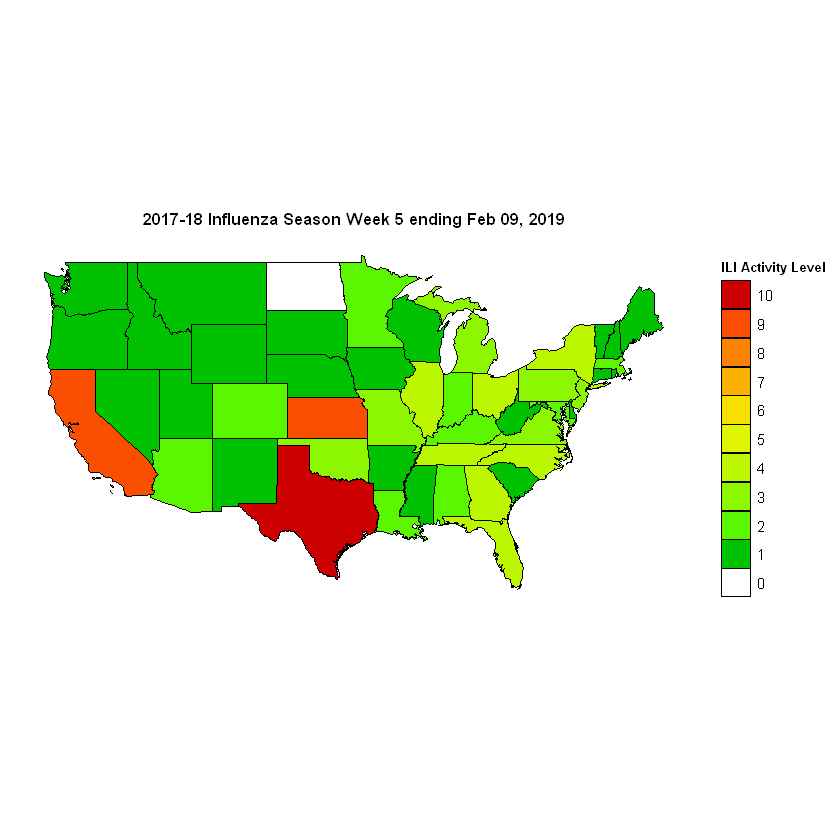

In [93]:
library(ggplot2)
library(repr)
library(reshape2)
library(grid)
library(magrittr) 
library(fiftystater)
library(mapproj)

copySeries <- tweetStateChartFinal$ACTIVITY.LEVEL

newSeries <- seq(1,49,1)
for (i in seq(1,49)) {
  process <-as.character(copySeries[i]) %>% as.integer()
    
  newSeries[i] <- process
}

tweetStateChartFinal$ACTIVITY.LEVEL <- newSeries %>% factor(levels = c("10", "9", "8", "7", "6", "5", "4", "3", "2", "1", "0"))

tweetStateChartFinal$STATENAME <- tweetStateChartFinal$STATENAME %>% tolower()
ggplot(tweetStateChartFinal, aes(fill=ACTIVITY.LEVEL, map_id=STATENAME)) +
  geom_map(map=fifty_states, color = 'black', size = 0.1) +
  expand_limits(x=fifty_states$long, y=fifty_states$lat) +
  coord_map() +
  theme_classic() +
  ggtitle("2017-18 Influenza Season Week 5 ending Feb 09, 2019") +
  scale_fill_manual(drop=FALSE, name = "ILI Activity Level", values = c("#cc0000", "#fa4f00", "#fc8200", "#fcb100", "#f7df00", "#e0f500", "#baf700", "#8cf700", "#5bf700", "#00c200", "white")) +
  theme(axis.title.x=element_blank(), axis.text.x=element_blank(),
        axis.ticks.x=element_blank(), axis.title.y = element_blank(),
        axis.text.y = element_blank(), axis.ticks.y = element_blank(),
        line = element_blank(),plot.title = element_text(hjust = 0.5, face = 'bold', size = 10),
        #legend.text = element_blank(),
        legend.title = element_text(face = 'bold', size = 8))

## Analysis : We plot the map for the term Flu and notice that there are lot of tweets in Texas 1157 out of the total 10000 tweets, Also Kansas and California have a lot of occurences of these numbers. This clearly shows that these states have still the effect of flu. Normallly the season of flu is from December - February but may still go on till May. These states have an effect of the flu outbreak; Also when we plot these maps using different terms like Flu, influenza, Fever we get similar results as these states are the most focused states where these tweets are coming from. States like North Dakota and Maine have very few occuerences of tweets